# Import Libraries

In [1]:
import os
import random
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from data import loader, utils

# Define Variables

In [73]:
dataset_directory = 'data/datasets'
large_data_config_directory = 'experiments/configs/datasets/large'
small_data_config_directory = 'experiments/configs/datasets/small'
large_eval_size = 0.1
large_test_size = 0.1
small_test_size = 0.5
seed = 0
timeframe_size = 28

# Reading Datasets

In [3]:
extracted_exchanges = set()
extracted_symbols = set()
dataset_configs = []

for filename in os.listdir(path=dataset_directory):
    exchange, symbol, _ = filename.split('_')
    extracted_exchanges.add(exchange)
    extracted_symbols.add(symbol)
    dataset_configs.append({'symbol': symbol, 'exchange': exchange})
        
f'Extracted {len(dataset_configs)} datasets of {len(extracted_exchanges)} unique exchanges and {len(extracted_symbols)} unique symbols'

'Extracted 151 datasets of 14 unique exchanges and 46 unique symbols'

# Splitting Datasets to Train-Eval-Test

In [4]:
def store_config_dicts(configs: dict[str, str], name: str, directory: str) -> None:
    with open(f'{directory}/{name}.pkl', 'wb') as dictfile:
        pickle.dump(configs, dictfile)
        
    config_table = []
    for config in configs:
        exchange = config['exchange']
        symbol = config['symbol']
        
        dataset_filepath = f'{dataset_directory}/{exchange}_{symbol}_d.csv'
        num_samples = len(open(dataset_filepath, 'r').readlines())-1
        config_table.append([exchange, symbol, num_samples])
    df = pd.DataFrame(data=config_table, columns=['exchange', 'symbol', 'sample-count'])

    print(f'\n--- {name} ---\n{df.to_string()}')


random.seed(seed)
large_train_configs, large_test_configs = utils.config_split_train_test(configs=dataset_configs, test_size=large_test_size)
large_train_configs, large_eval_configs = utils.config_split_train_test(configs=large_train_configs, test_size=large_eval_size)
small_train_configs, small_test_configs = utils.config_split_train_test(configs=large_test_configs, test_size=small_test_size)

print(
    f'Constructed {len(large_train_configs)} configs for Large Train Dataset\n'
    f'Constructed {len(large_eval_configs)} configs for Large Eval Dataset\n'
    f'Constructed {len(large_test_configs)} configs for Large Test Dataset\n'
    f'Constructed {len(small_train_configs)} configs for Small Train Dataset\n'
    f'Constructed {len(small_test_configs)} configs for Small Test Dataset\n'
)

print('\n--- Storing Large Dataset Configs ---')
store_config_dicts(configs=large_train_configs, name='train', directory=large_data_config_directory)
store_config_dicts(configs=large_eval_configs, name='eval', directory=large_data_config_directory)
store_config_dicts(configs=large_test_configs, name='test', directory=large_data_config_directory)

print('\n--- Storing Small Dataset Configs---')
store_config_dicts(configs=small_train_configs, name='train', directory=small_data_config_directory)
store_config_dicts(configs=small_test_configs, name='eval', directory=small_data_config_directory)

Constructed 121 configs for Large Train Dataset
Constructed 14 configs for Large Eval Dataset
Constructed 16 configs for Large Test Dataset
Constructed 8 configs for Small Train Dataset
Constructed 8 configs for Small Test Dataset


--- Storing Large Dataset Configs ---

--- train ---
     exchange     symbol  sample-count
0      Gemini    DOGEUSD          1329
1         CEX    AVAXUSD           542
2       Yobit     ETHUSD          1222
3      Okcoin     ETHUSD          1251
4         CEX     BTCUSD          3463
5    Bitstamp     LTCUSD          2395
6         CEX     XLMUSD          2100
7      Okcoin     BTCUSD          2301
8        Exmo   NEARUSDT           238
9     Binance   GALAUSDT           850
10      Itbit     BTCUSD          1237
11   Bitfinex     XRPUSD          2431
12      Yobit    DOGEUSD          1237
13     HitBTC    DOGEUSD           375
14        CEX     ADAUSD          1491
15       Exmo    DOTUSDT           239
16   Bitstamp    GALAUSD           658
17    Bittre

# Loading Candlesticks

In [62]:
dataset_loader = loader.DatasetLoader(dataset_directory=dataset_directory)
df = dataset_loader.load_datasets(dataset_configs=[{'exchange': 'Binance', 'symbol': 'BTCUSDT'}])
df.head(10)

,exchange,symbol,date,open,high,low,close,volume,ema,vwap,rsi,cci,adx,day,targets
0,Binance,BTCUSDT,2017-09-05,4106.97,4484.99,3603.00,4366.47,5.083453e+06,4402.514522,4376.599325,50.250949,-55.778540,0.000000,1,0.062941
1,Binance,BTCUSDT,2017-09-06,4366.49,4662.87,4335.26,4619.77,3.626346e+06,4431.481919,4412.747790,57.414561,76.594394,0.000000,2,0.056390
2,Binance,BTCUSDT,2017-09-07,4619.77,4788.59,4438.19,4691.61,2.305795e+06,4466.165663,4436.529796,59.208599,97.521944,0.000000,3,0.015431
3,Binance,BTCUSDT,2017-09-08,4691.66,4735.39,4028.93,4282.80,4.866527e+06,4441.716908,4433.161471,47.059196,-2.054248,0.000000,4,-0.091169
4,Binance,BTCUSDT,2017-09-09,4282.80,4426.62,4150.06,4258.81,2.815383e+06,4417.329320,4426.648908,46.456758,-30.426332,0.000000,5,-0.005617
5,Binance,BTCUSDT,2017-09-10,4258.81,4283.00,3801.00,4130.37,2.700372e+06,4379.068078,4409.980566,43.263429,-106.893647,0.000000,6,-0.030623
6,Binance,BTCUSDT,2017-09-11,4153.62,4334.43,4098.91,4208.47,2.956843e+06,4356.321667,4403.804815,45.707264,-67.196684,0.000000,0,0.018732
7,Binance,BTCUSDT,2017-09-12,4208.60,4394.59,4040.80,4163.72,3.725191e+06,4330.641445,4383.080203,44.523873,-75.374249,0.000000,1,-0.010690
8,Binance,BTCUSDT,2017-09-13,4159.72,4165.38,3760.00,3944.69,3.570366e+06,4279.181252,4341.258715,39.177327,-155.441364,36.538548,2,-0.054039
9,Binance,BTCUSDT,2017-09-14,3944.00,3993.00,3165.13,3189.02,5.914261e+06,4133.826419,4226.566357,27.090533,-271.670427,38.158837,3,-0.212657


# Visualize Targets & Absolute Prices

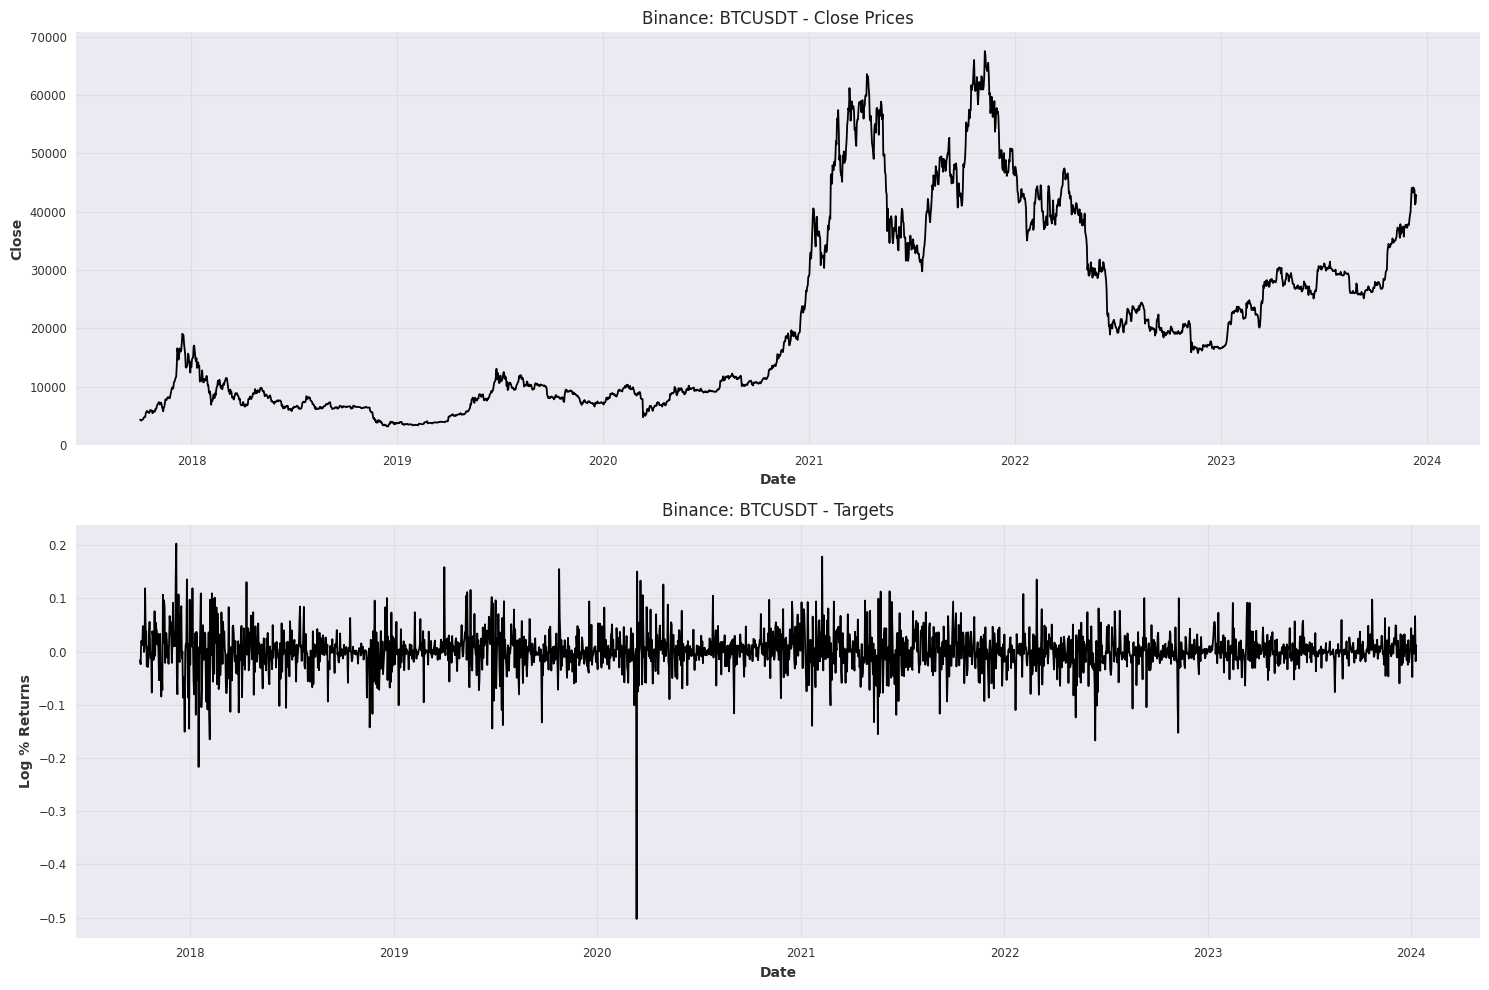

In [8]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))
axs = axs.flatten()

sns.lineplot(data=df.iloc[timeframe_size - 1: - timeframe_size], x='date', y='close', ax=axs[0])
axs[0].set_title(f'Binance: BTCUSDT - Close Prices')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Close')

sns.lineplot(data=df.iloc[timeframe_size:], x='date', y='targets', ax=axs[1])
axs[1].set_title(f'Binance: BTCUSDT - Targets')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Log % Returns')

plt.tight_layout()
plt.show()

# Convert Timeseries to Images

In [9]:
x, y = utils.construct_image_dataset(df=df, timeframe_size=timeframe_size)
x.shape, y.shape

((2291, 12, 28, 28), (2291, 1))

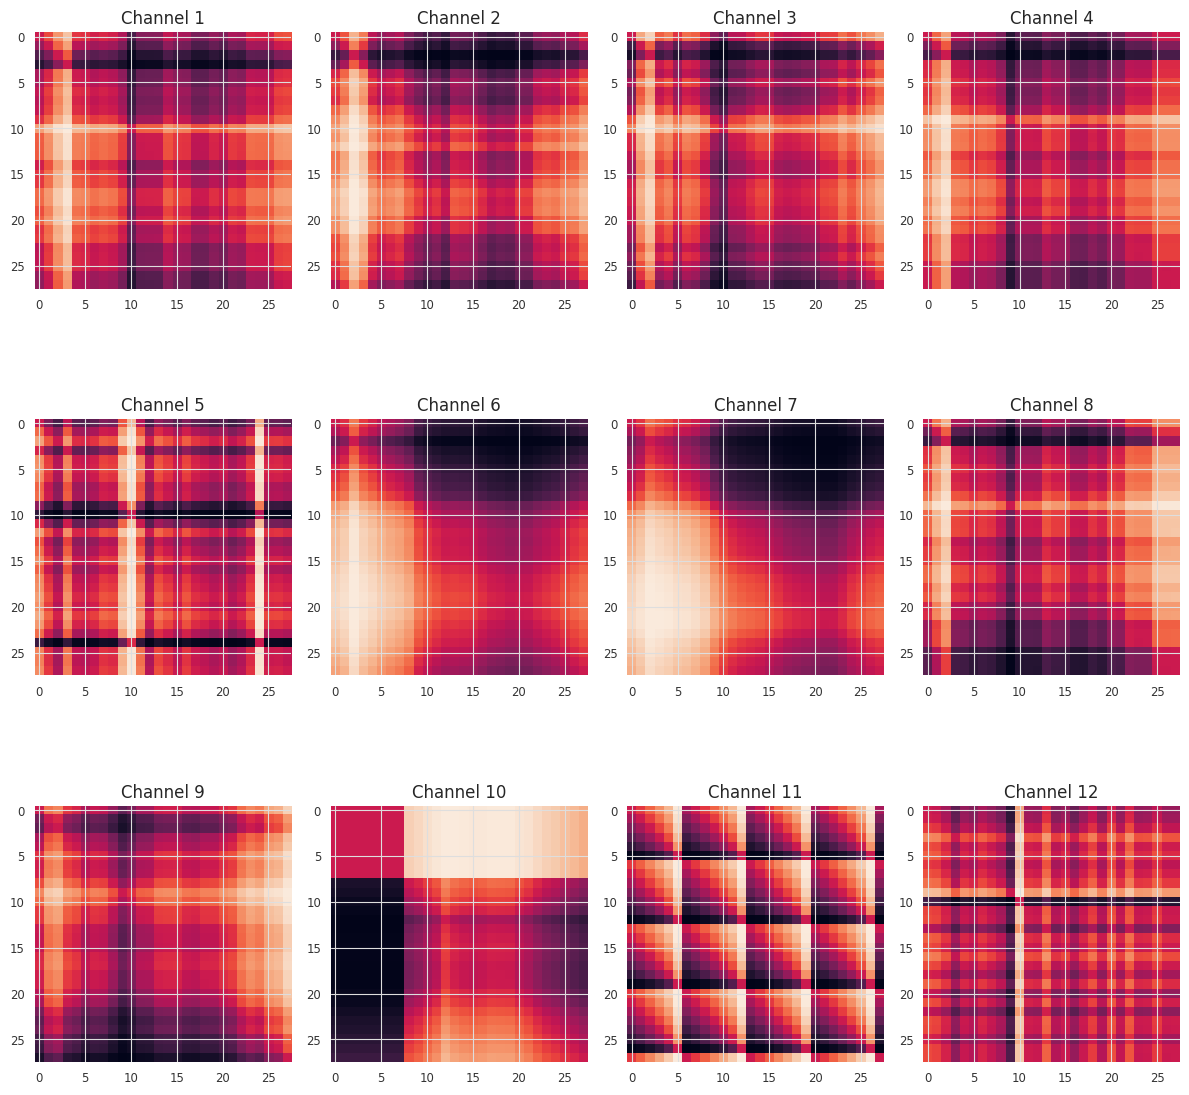

In [10]:
fig, axs = plt.subplots(3, 4, figsize=(12, 12))
axs = axs.flatten()

for i in range(x.shape[1]):
    axs[i].imshow(x[0, i])
    axs[i].set_title(f'Channel {i+1}')

plt.tight_layout()
plt.show()

# Add Candlestick Noise

In [74]:
dataset_loader = loader.DatasetLoader(dataset_directory=dataset_directory)
noisy_df = dataset_loader.load_datasets(dataset_configs=[{'exchange': 'Binance', 'symbol': 'BTCUSDT'}], noise_percentage=0.1)
noisy_df.head(10)

,exchange,symbol,date,open,high,low,close,volume,ema,vwap,rsi,cci,adx,day,targets
0,Binance,BTCUSDT,2017-09-05,4521.296198,4937.452242,3966.483856,4806.975510,5.596291e+06,4846.656335,4818.126718,50.250949,-55.778540,0.000000,1,0.062941
1,Binance,BTCUSDT,2017-09-06,4806.997528,5133.277429,4772.616931,5085.829343,3.992185e+06,4878.546070,4857.921973,57.414561,76.594394,0.000000,2,0.056390
2,Binance,BTCUSDT,2017-09-07,5085.829343,5271.680524,4885.930887,5164.916826,2.538412e+06,4916.728837,4884.103196,59.208599,97.521944,0.000000,3,0.015431
3,Binance,BTCUSDT,2017-09-08,5164.971870,5213.113513,4435.383237,4714.864573,5.357480e+06,4889.813602,4880.395061,47.059196,-2.054248,0.000000,4,-0.091169
4,Binance,BTCUSDT,2017-09-09,4714.864573,4873.193663,4568.733275,4688.454374,3.099410e+06,4862.965705,4873.225487,46.456758,-30.426332,0.000000,5,-0.005617
5,Binance,BTCUSDT,2017-09-10,4688.454374,4715.084750,4184.458822,4547.056876,2.972795e+06,4820.844528,4854.875581,43.263429,-106.893647,0.000000,6,-0.030623
6,Binance,BTCUSDT,2017-09-11,4572.652421,4771.703197,4512.423076,4633.035890,3.255140e+06,4795.803376,4848.076798,45.707264,-67.196684,0.000000,0,0.018732
7,Binance,BTCUSDT,2017-09-12,4633.179005,4837.932359,4448.450726,4583.771346,4.101002e+06,4767.532439,4825.261411,44.523873,-75.374249,0.000000,1,-0.010690
8,Binance,BTCUSDT,2017-09-13,4579.367812,4585.598813,4139.322592,4342.644796,3.930558e+06,4710.880753,4779.220818,39.177327,-155.441364,36.538548,2,-0.054039
9,Binance,BTCUSDT,2017-09-14,4341.885187,4395.828486,3484.439924,3510.740035,6.510914e+06,4550.861991,4652.957875,27.090533,-271.670427,38.158837,3,-0.212657


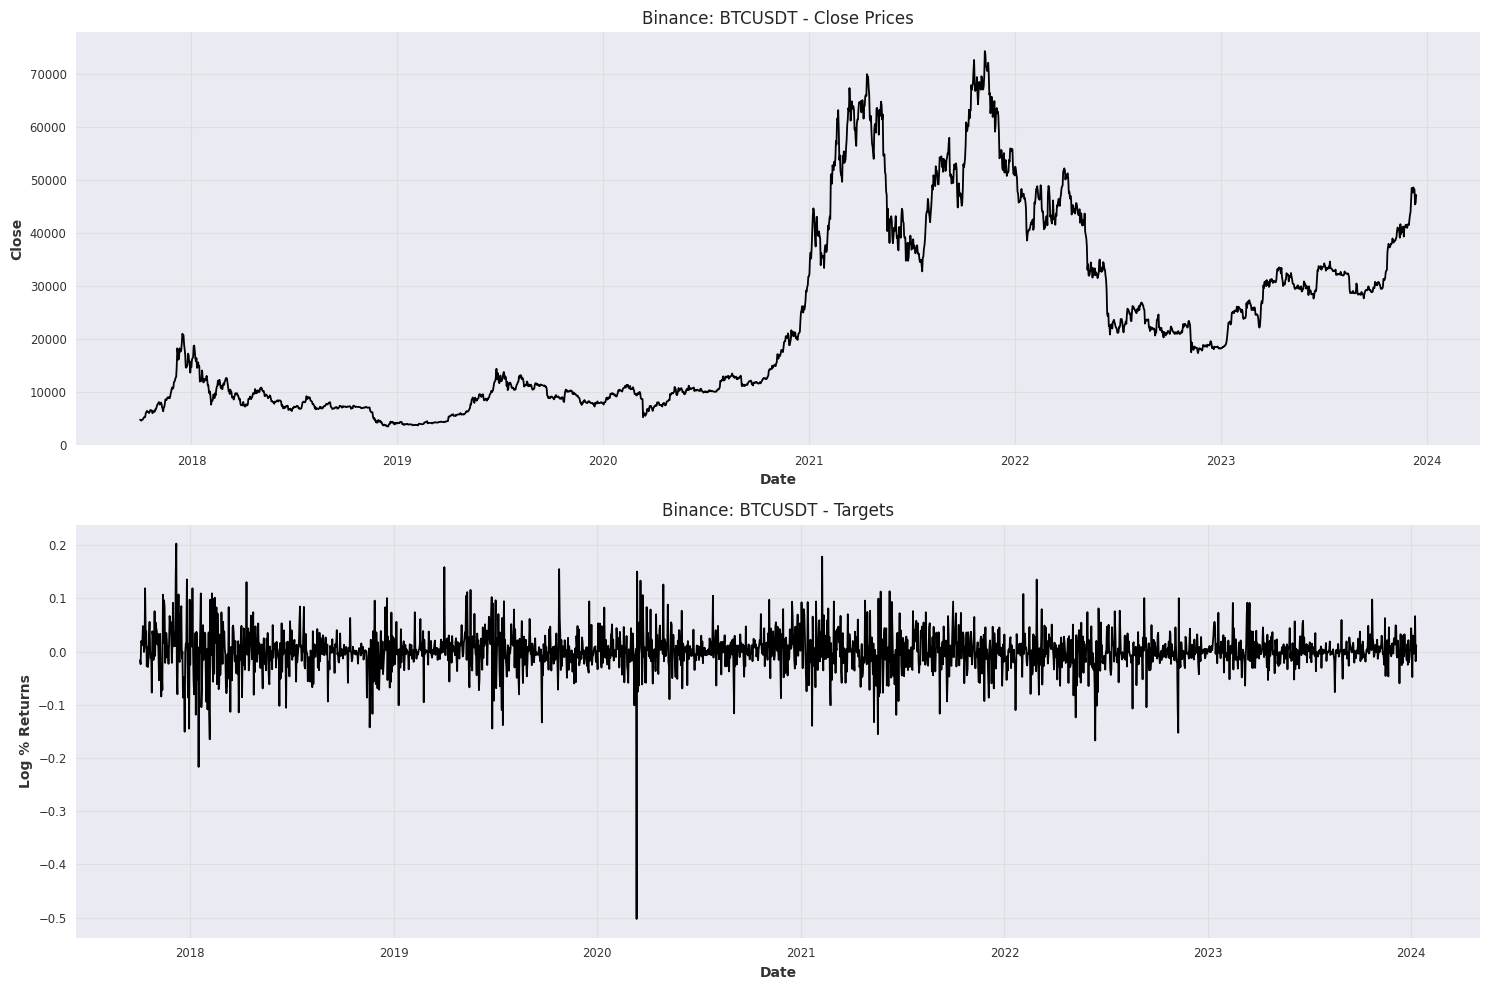

In [75]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))
axs = axs.flatten()

sns.lineplot(data=noisy_df.iloc[timeframe_size - 1: - timeframe_size], x='date', y='close', ax=axs[0])
axs[0].set_title(f'Binance: BTCUSDT - Close Prices')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Close')

sns.lineplot(data=noisy_df.iloc[timeframe_size:], x='date', y='targets', ax=axs[1])
axs[1].set_title(f'Binance: BTCUSDT - Targets')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Log % Returns')

plt.tight_layout()
plt.show()

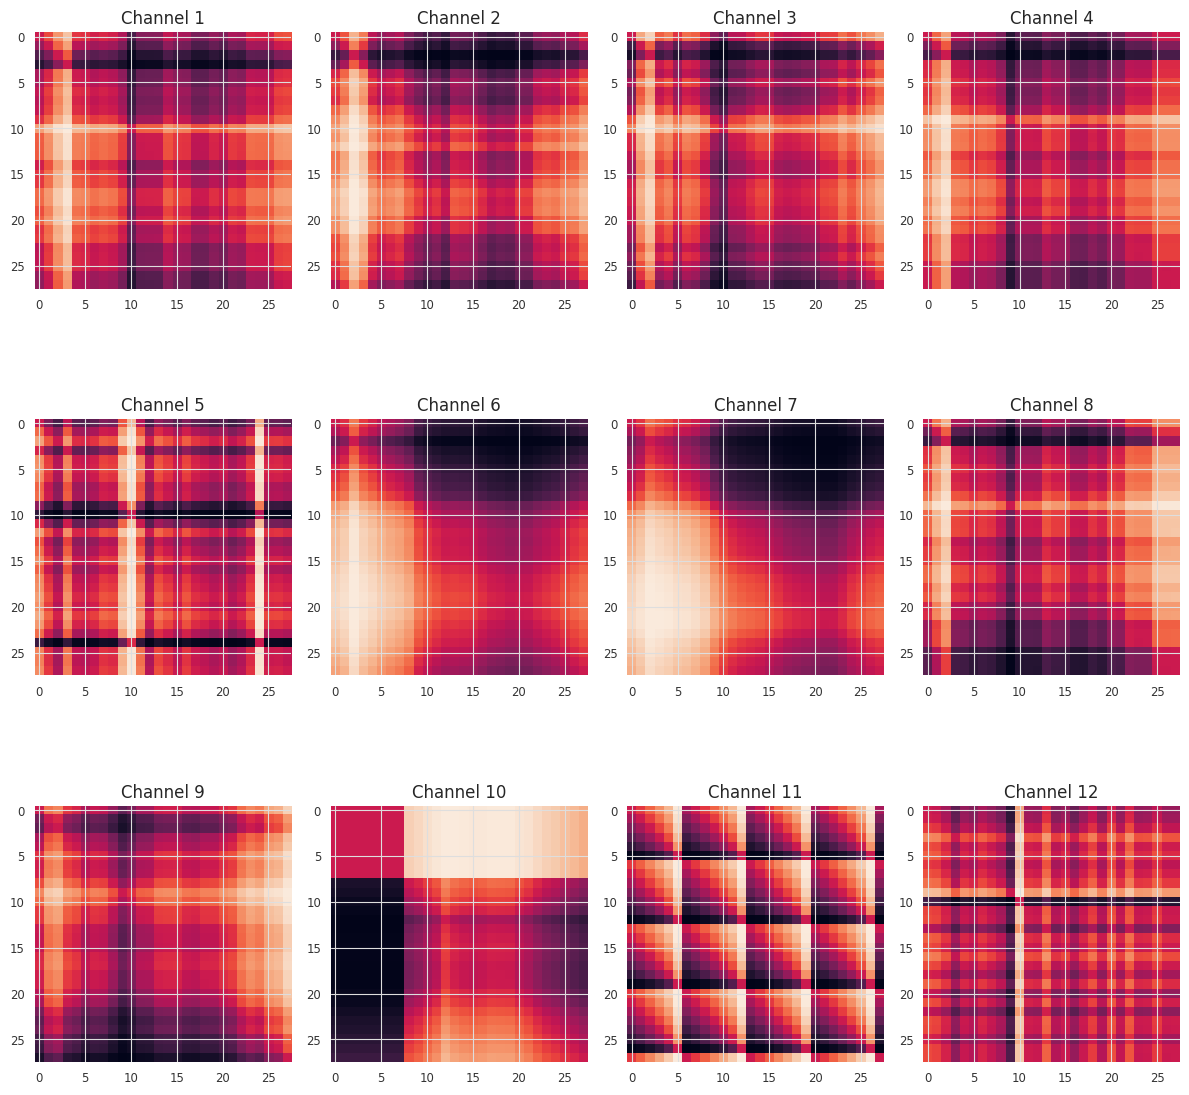

In [76]:
x_noisy, y_noisy = utils.construct_image_dataset(df=noisy_df, timeframe_size=timeframe_size)

fig, axs = plt.subplots(3, 4, figsize=(12, 12))
axs = axs.flatten()

for i in range(x_noisy.shape[1]):
    axs[i].imshow(x_noisy[0, i])
    axs[i].set_title(f'Channel {i+1}')

plt.tight_layout()
plt.show()

# Comparing Original with Noisy

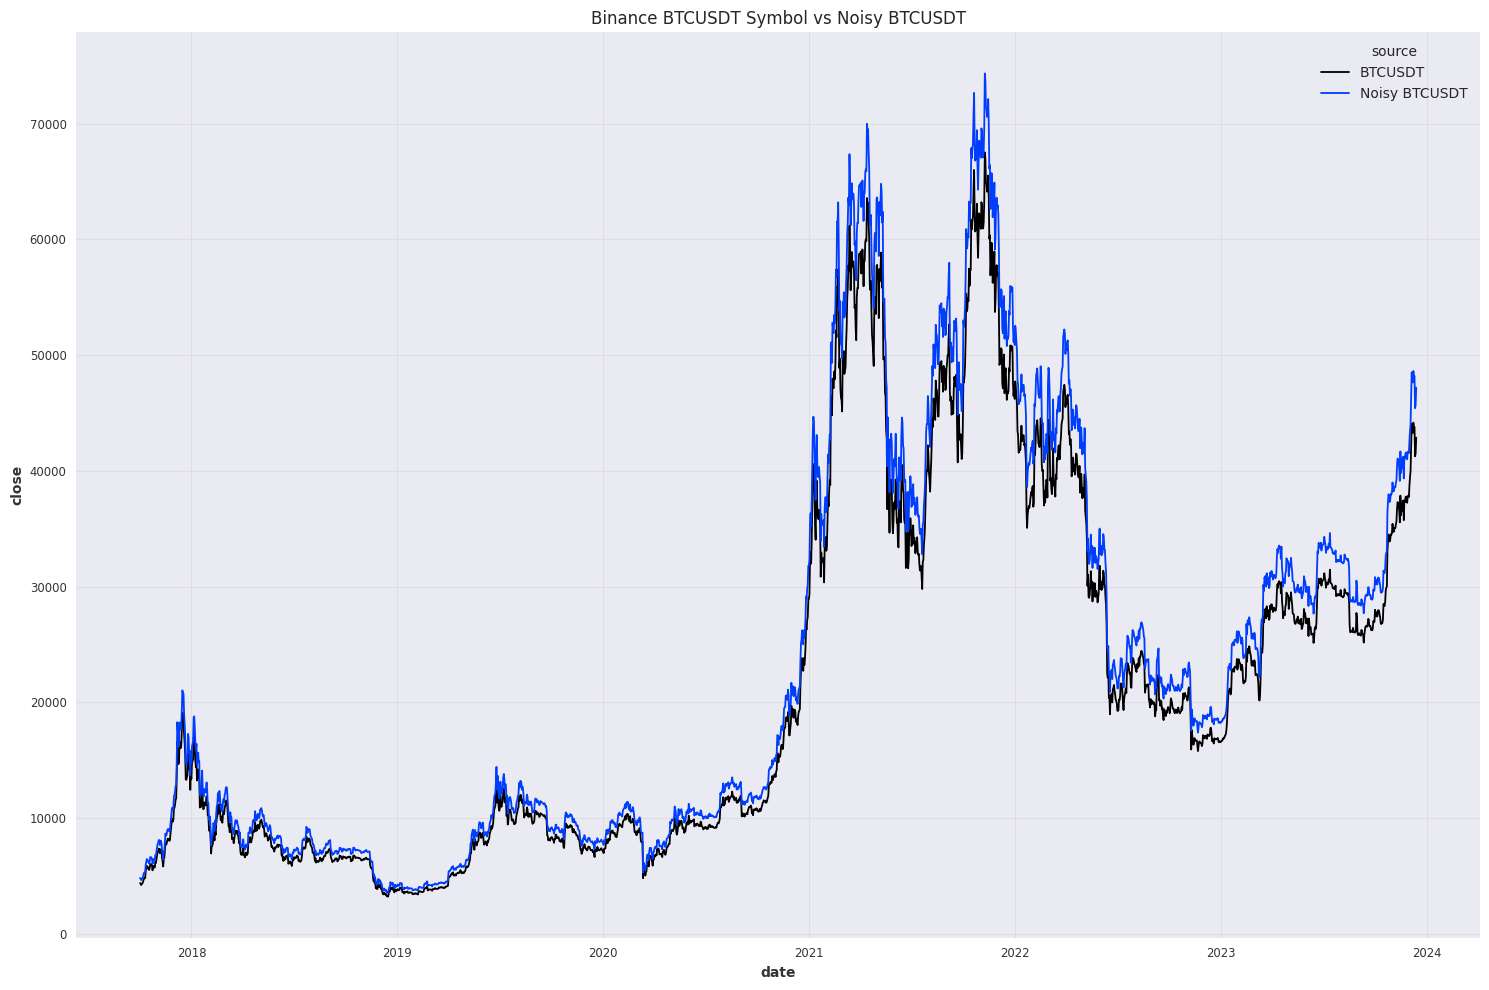

In [77]:
df['source'] = 'BTCUSDT'
noisy_df['source'] = 'Noisy BTCUSDT'
df_combined = pd.concat([
    df.iloc[timeframe_size - 1: - timeframe_size], 
    noisy_df.iloc[timeframe_size - 1: - timeframe_size]
])

plt.figure(figsize=(15, 10))
sns.lineplot(data=df_combined, x='date', y='close', hue='source').set_title(f'Binance BTCUSDT Symbol vs Noisy BTCUSDT')
plt.tight_layout()
plt.show()

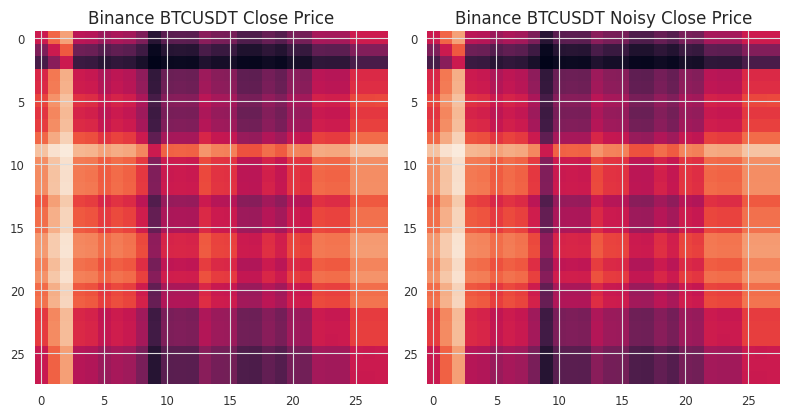

In [78]:
fig, axs = plt.subplots(1, 2, figsize=(8, 8))
axs = axs.flatten()
axs[0].imshow(x[0, 3])
axs[0].set_title('Binance BTCUSDT Close Price')
axs[1].imshow(x_noisy[0, 3])
axs[1].set_title(f'Binance BTCUSDT Noisy Close Price')
plt.tight_layout()
plt.show()